# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final conclusion](#conclusion)


<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.


<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
# read dataset from csv file
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
# determining number of raws using shape method.
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [4]:
#determining number of unique values.
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [5]:
#determining total pop conversion rate
df.groupby("user_id")["converted"].sum().sum()/df.shape[0]

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
# determining treatment group's landing page mismatches
df.query("group == 'treatment' & landing_page != 'new_page'").shape[0]

1965

In [7]:
# determining control group's landing page mismatches
df.query("group == 'control' & landing_page != 'old_page'").shape[0]

1928

**f.** Do any of the rows have missing values?

In [8]:
# identifing missing values in data frame columns
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

**Answer** 

Data frame have no missing values. 

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  

In [9]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df_1 = df.query("group == 'treatment' & landing_page == 'new_page'")
df_2 = df.query("group == 'control' & landing_page == 'old_page'")
df2 = pd.concat([df_1,df_2])  # reference (1)
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [10]:
#Determinig Data frame size after removal of inaccurate data
df2.shape

(290585, 5)

In [11]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [12]:
# determining unique values/
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [13]:
# determining duplicated value.
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [14]:
#displaying rows with duplicates.
df2[df2["user_id"] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [15]:
# Remove one of the rows with a duplicate user_id.
df2.drop(index = 2893, inplace = True )
# Check again if the row with a duplicate user_id is deleted or not
df2.user_id.duplicated().any()

False

### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

In [16]:
# determining conversion rate of total population.
p_pop = df2.converted.mean()
p_pop

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
# Determining conversion rate for control group
p_control = df2[df2["group"] == "control"]["converted"].mean()
p_control

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
# Determining conversion rate for treatment group
p_treat = df2[df2["group"] == "treatment"]["converted"].mean()
p_treat

0.11880806551510564

In [19]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = p_treat - p_control
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [20]:
# determining rate of being in treatment group.
df2[df2["landing_page"] == "new_page"].shape[0]/df2.shape[0]

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

### Answer: 

the conversion value of people showed the old page was 0.1203863045004612 which is higher than the conversion range of the peaple showed the new page 0.11880806551510564. according to the present data, the group showed old page (control group ) have slightly higher conversion rate, however this difference can be insignificance and have no effect on conversion rate.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

### Answer

<center>
$H_0$ : $p_{old}$ >= $p_{new}$.
<center>
$H_1$: $p_{new}$ < $p_{old}$.


### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>


**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [21]:
# because null hyposis assume that rate of convertion equal rate convertion in population 
#p_new = p_old = p_population which means the average of total population conversion
p_new = df2.converted.mean()
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [22]:
# according to null hyposis both conversion rates are equal
p_old = p_new
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [23]:
#detemining number of treatment group
n_new = df2[df2["group"] == "treatment"].shape[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [24]:
# determining number of control group
n_old = df2[df2["group"] == "control"].shape[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

In [25]:
# Simulate a Sample for the treatment Group
p_1 = p_new
p_0 = 1-p_new
sample_size = n_new
new_page_converted = np.random.choice([0,1], size = sample_size, p = [p_0,p_1])
new_page_converted

array([0, 1, 0, ..., 0, 0, 0])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [26]:
# Simulate a Sample for the control Group
p_1 = p_old 
p_0 = 1-p_old
sample_size = n_old
old_page_converted = np.random.choice([0,1], size = sample_size, p = [p_0,p_1])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [27]:
# measuring average values of new simulated samples and calculating differance.
sample_p_new = new_page_converted.mean()
sample_p_old = old_page_converted.mean()
diff = sample_p_new - sample_p_old
diff

0.0012571536478700324


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [28]:
# Sampling distribution using loop to generate array of conversion rate difference
p_diffs = []
for _ in range (10000):
    new_page_converted = np.random.choice([0,1], size = n_new, p = [1-p_new,p_new])
    new_page_converted = np.random.choice([0,1], size = n_old, p = [1-p_old,p_old])
    sample_p_new = new_page_converted.mean()
    sample_p_old = old_page_converted.mean()
    diff = sample_p_new - sample_p_old
    p_diffs.append(diff)

p_diffs = np.array(p_diffs)


**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

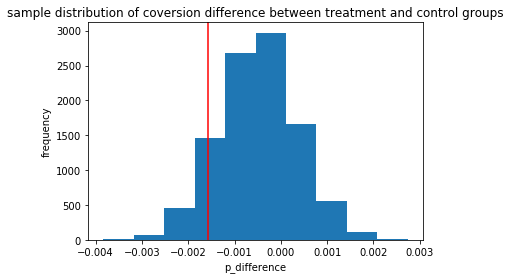

In [29]:
# visualizing sampling distribution of conversion rate differnence and identifing location of observed difference
plt.hist(p_diffs)
plt.axvline(obs_diff, color = "red")
plt.title("sample distribution of coversion difference between treatment and control groups" )
plt.xlabel("p_difference")
plt.ylabel("frequency");

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [30]:
# determining p Value 
(p_diffs > obs_diff).mean()

0.90010000000000001

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages?  

### Answers:

* p value.
* There is no significant difference between the new and old page. Hence, the test have failed to reject null hyposis.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [31]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query("landing_page == 'old_page' & converted == '1'").shape[0]

# number of conversions with the new_page
convert_new = df2.query("landing_page == 'new_page' & converted == '1'").shape[0]

# number of individuals who were shown the old_page
n_old = df2.query("landing_page == 'old_page'").shape[0]

# number of individuals who received new_page
n_new = df2.query("landing_page == 'new_page'").shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [32]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new],[n_old,n_new],alternative="smaller")
print(z_score, p_value)

1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>


### Answer:

* Z-score is 1.310 which is less than 1.645 or the value of Z in confidence level 95%. The produced Z-score showes that it failed to reject null hyposis and that there are no significant difference between users showed old and new page in there convertion level. 
* The p-value is different than computed using bootstrap method. however both is larger than type-1 error threshold (0.05) and hence both tests failed to reject null hyposis. 

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

### Answer:

Logistic regression

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [33]:
# adding intercept coloum, creating dummy variables for group column and droping control dummy.
df2["intercept"] = 1
df2[["control","ab_page"]] = pd.get_dummies(df2["group"])
df2.drop("control", axis = 1, inplace = True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [34]:
#instantiate regression model and fitting 
log = sm.Logit(df2["converted"], df2[["intercept","ab_page"]])
res = log.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
# reading summary of regression model result
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-12-11 19:53 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  



### Answer:

* p-value of ab_page is 0.1899

* it differs from part II p-value as the regression p-value is measuring if a certain variable is useful for prediction of the response variable. The hyposis in this condition is prediction if the variable coefficient is equal to zero or not (two-sided). when the p-value is higher than 0.05 threshold, that mean the coefficient is equal to zero and the ab_page variable have no effect of conversion rate. when the p-value of part II was measuring the orginal hyposis of conversion rate difference between two population groups of our A/B test where considering if the new page performing better than the old one (one sided hyposis).


**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

### Answer:
* adding new variables to the regression can increase the predictability of the response variable avoiding bais toward only one variable.

* disadvantage of multiple variables can occur from multicolineary effect if the independat variables is correlated or dependent on each others. 



**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in.

In [36]:
# Read the countries.csv
c_df = pd.read_csv("countries.csv")
c_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [37]:
#check for duplicates
c_df.duplicated().any()

False

In [47]:
#check for dataframe size
c_df.shape[0]

290584

In [39]:
#compare df2 size to the countries data frame
df2.shape[0]

290584

In [40]:
# Join with the df2 dataframe
df_merged = pd.merge(c_df, df2, on = "user_id") # reference (2)
df_merged.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [41]:
# determining new merged data frame and check for any duplicates.
df_merged.shape[0], df_merged.duplicated().any()

(290584, False)

In [42]:
# Create the necessary dummy variables
df_merged[["CA","UK","US"]] = pd.get_dummies(df_merged["country"])
df_merged.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [43]:
# instantiate regression model, fitting and showing result.
log = sm.Logit(df_merged["converted"], df_merged[["intercept", "ab_page","CA", "UK"]])
res = log.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-12-11 19:53 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

### Does it appear that country had an impact on conversion?

The p-value of both CA and UK is much higher than type 1 error threshold (0.05) with 0.13 and 0.46 , respectively,indicating that the coeffecient of those variables are near or equal to zero. This proveing that countries from which the page are viewed have no impact on conversion . 

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


In [44]:
# create coloums for interaction between countries and landing page dummies.
df_merged["UK_page"] = df_merged["UK"]*df_merged["ab_page"]
df_merged["CA_page"] = df_merged["CA"]*df_merged["ab_page"]
df_merged.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,UK_page,CA_page
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [45]:
# Fit your model, and summarize the results
log = sm.Logit(df_merged["converted"], df_merged[["intercept", "ab_page","CA", "UK","UK_page","CA_page"]])
res = log.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-12-11 19:53 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
UK_page       0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
CA_page      -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
==================================================================

"""


p_values of tested variables showed that these variables have no correlation with conversion rate. all of p values have been higher than 0.05 threshold, hence the test failed to reject null hyposis. meaning that all present coeffecient are either near or equal to zero. 
<a id='conclusion'></a>
## Final Conclusion: 

In conclusion, according to p_values predicted by bootstraping test and Z-test, it failed to reject null hyposis. thus the new page have not been proven to be better than the old one on the conversion rate. In fact, as showen by the multiple logistic regression analysis, the implemntation of the new page may have no effect on the conversion rate. the suggested results and conclusion is limited to the provided data and may require futher analysis with different variables and factors. 

In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0